In [1]:
from typing import List, Dict
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.constraints import max_norm
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('../data/titanic/train.csv')
test_data = pd.read_csv('../data/titanic/test.csv')

In [3]:
train_data['Sex'] = train_data['Sex'].map({'male':1,'female':0})
test_data['Sex'] = test_data['Sex'].map({'male':1,'female':0})

In [4]:
train_data["Embarked"] = train_data["Embarked"].map({'S':0,'C':1,'Q':2})
train_data["Embarked"] = train_data["Embarked"].fillna(4)
test_data["Embarked"] = test_data["Embarked"].map({'S':0,'C':1,'Q':2})
test_data["Embarked"] = test_data["Embarked"].fillna(4)

In [5]:
train_data["Age"].fillna((train_data["Age"].median()))
test_data["Age"].fillna((test_data["Age"].median()))
train_data = train_data.dropna()
test_data = test_data.dropna()

In [6]:
train_data = train_data.drop('Name', axis=1)
train_data = train_data.drop('Ticket', axis=1)
train_data = train_data.drop('Cabin', axis=1)
train_data = train_data.drop('PassengerId', axis=1)
train_data = train_data.drop('Fare', axis=1)
train_data = train_data.drop('Embarked', axis=1)
test_data = test_data.drop('Name', axis=1)
test_data = test_data.drop('Ticket', axis=1)
test_data = test_data.drop('Cabin', axis=1)
test_data = test_data.drop('PassengerId', axis=1)
test_data = test_data.drop('Fare', axis=1)
test_data = test_data.drop('Embarked', axis=1)

In [7]:
NODES = 6
COLUMNS = ["Pclass", "Sex", "Age", "SibSp", "Parch"]

In [8]:
train_data.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch
1,1,1,0,38.0,1,0
3,1,1,0,35.0,1,0
6,0,1,1,54.0,0,0


In [9]:
X = train_data.drop('Survived',axis=1).values
y = train_data['Survived'].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
model = Sequential()
model.add(Dense(6, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])

In [13]:
def create_history(columns: int, nodes: int) -> Dict:
    return {i:{j: [] for j in range(nodes)} for i in range(columns)}

In [14]:
history = create_history(5, 6)
history

{0: {0: [], 1: [], 2: [], 3: [], 4: [], 5: []},
 1: {0: [], 1: [], 2: [], 3: [], 4: [], 5: []},
 2: {0: [], 1: [], 2: [], 3: [], 4: [], 5: []},
 3: {0: [], 1: [], 2: [], 3: [], 4: [], 5: []},
 4: {0: [], 1: [], 2: [], 3: [], 4: [], 5: []}}

In [15]:
for epoch in range(1, 501):
    print(f"RUNNING EPOCH {epoch}")
    hist = model.fit(x=X_train, 
      y=y_train, 
      epochs=1,
      batch_size=100,
      validation_data=(X_test, y_test), 
      )
    all_weights = model.layers[0].get_weights()[0].tolist()
    for column in range(len(all_weights)):
        for node in range(len(all_weights[column])):
            history[column][node].append(all_weights[column][node])

RUNNING EPOCH 1
2/2 [==============================] - 1s 237ms/step - loss: 0.7278 - accuracy: 0.6216 - val_loss: 0.8688 - val_accuracy: 0.5676
RUNNING EPOCH 2
2/2 [==============================] - 0s 53ms/step - loss: 0.7253 - accuracy: 0.6622 - val_loss: 0.8646 - val_accuracy: 0.5676
RUNNING EPOCH 3
2/2 [==============================] - 0s 51ms/step - loss: 0.7228 - accuracy: 0.6622 - val_loss: 0.8603 - val_accuracy: 0.5676
RUNNING EPOCH 4
2/2 [==============================] - 0s 51ms/step - loss: 0.7203 - accuracy: 0.6959 - val_loss: 0.8562 - val_accuracy: 0.5676
RUNNING EPOCH 5
2/2 [==============================] - 0s 49ms/step - loss: 0.7180 - accuracy: 0.6959 - val_loss: 0.8520 - val_accuracy: 0.5676
RUNNING EPOCH 6
2/2 [==============================] - 0s 48ms/step - loss: 0.7157 - accuracy: 0.6959 - val_loss: 0.8479 - val_accuracy: 0.5676
RUNNING EPOCH 7
2/2 [==============================] - 0s 49ms/step - loss: 0.7133 - accuracy: 0.6959 - val_loss: 0.8440 - val_accuracy

In [16]:
results = model.evaluate(X_test, y_test)
results

2/2 [==============================] - 0s 41ms/step - loss: 0.5286 - accuracy: 0.7297


[0.5286163687705994, 0.7297297716140747]

In [17]:
start_index = 0

def get_groups(index: int, nodes: int) -> List:
    group = []
    for i in range(nodes):
        group.append(history[index][i][start_index:])
    return group

In [18]:
COLUMNS

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']

In [19]:
classes = get_groups(0, NODES)
sexes = get_groups(1, NODES)
ages = get_groups(2, NODES)
sibsps = get_groups(3, NODES)
parch = get_groups(4, NODES)

In [20]:
light = "#90CCF4"
darker = "#5DA2D5"
important = "#F3D250"
noise = "#F78888"
other = "#ECECEC"

In [21]:
def generate_box_plot(ax, data: List, color: str, label: str, position_offset: int = 0, showfliers: bool = False):
    ax.set_xlabel("Input Column and Node Number")
    ax.set_ylabel("Weight Values")
    color = {"color": color}
    ax.boxplot(
        data,
        positions=[i + position_offset for i in range(1,7)],
        boxprops=color,
        medianprops=color,
        whiskerprops=color,
        capprops=color,
        flierprops={"markeredgecolor": other},
        showfliers=showfliers,
        labels=[f"{label}{i}" for i in range(1,7)]
    )

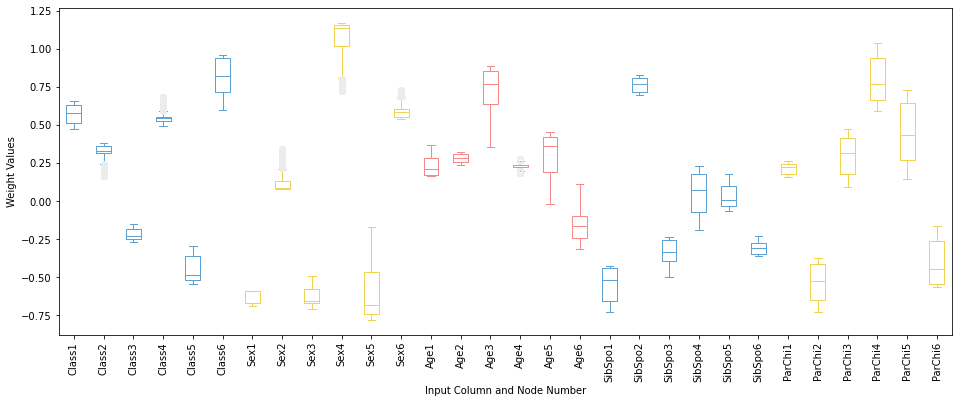

In [22]:
"PassengerId	Pclass	Sex	Age	SibSp	Parch	Fare	Embarked"

fig, ax = plt.subplots(figsize=(16,6))
generate_box_plot(ax, classes, darker, "Class", 0, showfliers=True)
generate_box_plot(ax, sexes, important, "Sex", 6, showfliers=True)
generate_box_plot(ax, ages, noise, "Age", 12, showfliers=True)
generate_box_plot(ax, sibsps, darker, "SibSpo", 18, showfliers=True)
generate_box_plot(ax, parch, important, "ParChi", 24, showfliers=True)
for label in ax.get_xticklabels():
    label.set_rotation(90)

In [23]:
def get_group_by_node(index: int) -> List:
    group = []
    for i in list(history.keys()):
        group.append(history[i][index])
    return group

In [24]:
group_one = get_group_by_node(0)
group_two = get_group_by_node(1)
group_three = get_group_by_node(2)
group_four = get_group_by_node(3)
group_five = get_group_by_node(4)
group_six = get_group_by_node(5)

In [25]:
import math
from statistics import mean, stdev
from scipy.stats import norm

def plot_stds(group):
    fig, ax = plt.subplots(figsize=(16,6))
    domain = np.linspace(-2,2,1000)
    means = [mean(group[i]) for i in range(len(group))]
    stds = [stdev(group[i]) for i in range(len(group))]
    colors = [noise, light, important, noise, important, light, noise, noise]
    for mu, std, color in zip(means, stds, colors):
        probs = norm.pdf(domain, mu, std)
        ax.plot(domain, probs, color=color)
        ax.set_xlabel("Weight")
        ax.set_ylabel("Probability Density")

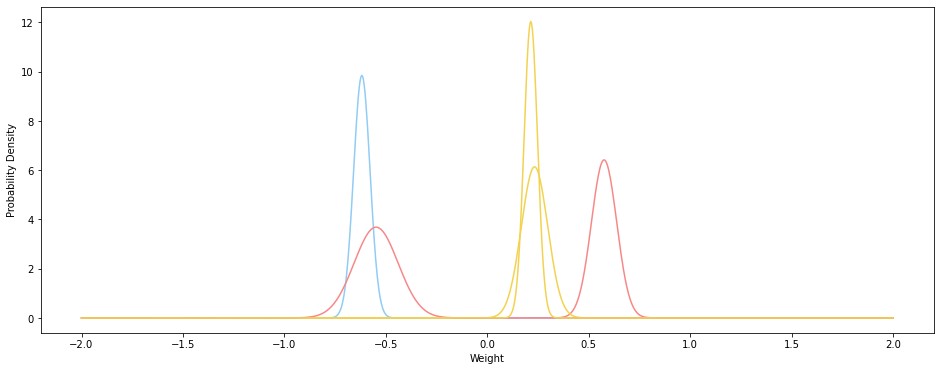

In [26]:
plot_stds(group_one)

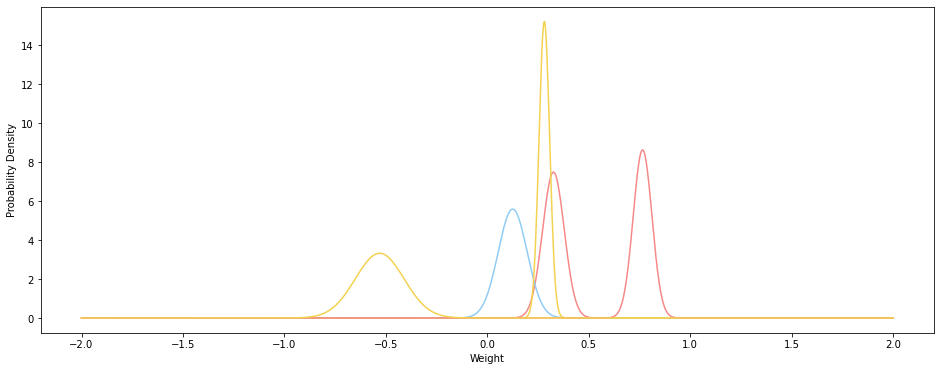

In [27]:
plot_stds(group_two)

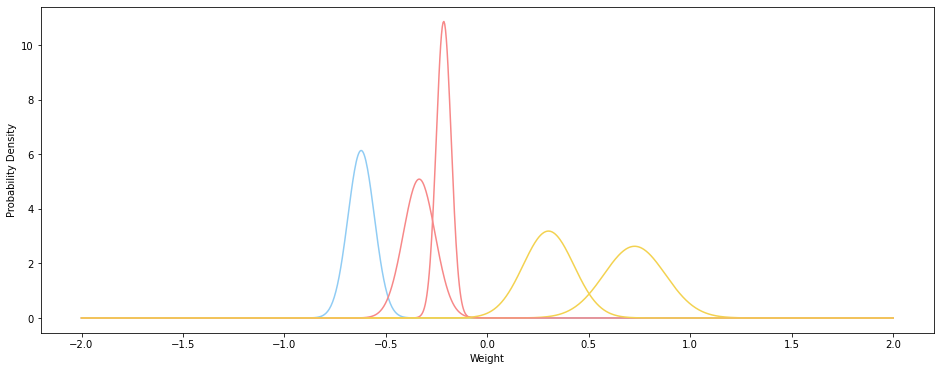

In [28]:
plot_stds(group_three)

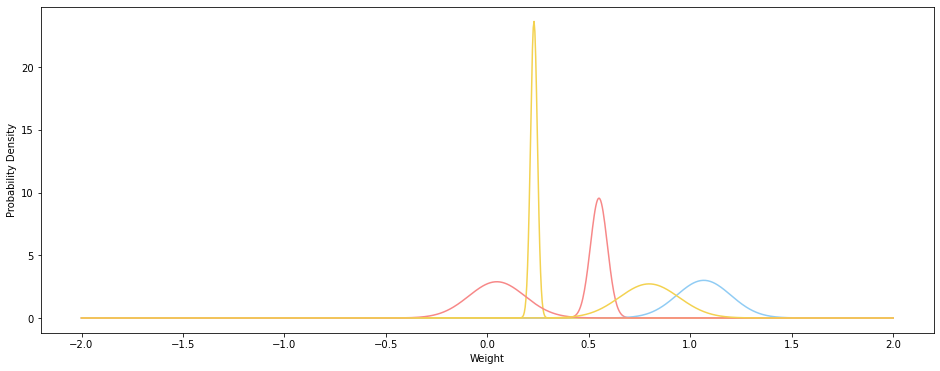

In [29]:
plot_stds(group_four)

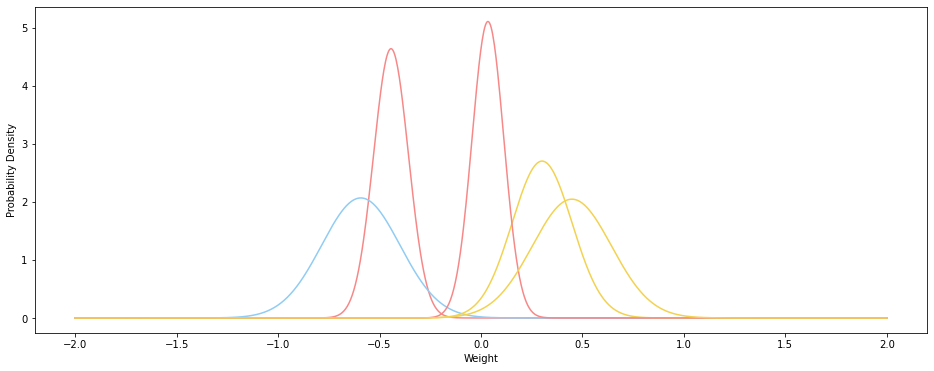

In [30]:
plot_stds(group_five)

In [31]:
def get_props(group):
    domain = np.linspace(-2,2,1000)
    means = [mean(group[i]) for i in range(len(group))]
    stds = [stdev(group[i]) for i in range(len(group))]
    results = []
    for mu, std in zip(means, stds):
        values = []
        probs = norm.pdf(domain, mu, std)
        for prob in probs:
            if math.floor(prob) != 0:
                values.append(prob)
        results.append(values)
    return results

In [32]:
groups = [group_one, group_two, group_three, group_four, group_five]
all_probs = [get_props(group) for group in groups]

In [33]:
def barrage(all_prob, columns: int):
    res = {i: {"len": 0, "max": 0, "sum": 0, "mean": 0, "stdev": 0} for i in range(columns)}
    for probs in all_probs:
        for i, prob in enumerate(probs):
            res[i]["len"] += len(prob)
            res[i]["max"] += max(prob)
            res[i]["sum"] += sum(prob)
            res[i]["mean"] += mean(prob)
            res[i]["stdev"] += stdev(prob)
    return res

In [34]:
res = barrage(all_probs, 5)
for i in range(len(COLUMNS)):
    res[COLUMNS[i]] = res.pop(i)
res

{'Pclass': {'len': 273,
  'max': 38.97434000582504,
  'sum': 1188.7243900122169,
  'mean': 22.93669408943521,
  'stdev': 11.515478748729107},
 'Sex': {'len': 386,
  'max': 26.65284551515555,
  'sum': 1119.2826644193742,
  'mean': 16.79826942214799,
  'stdev': 7.235099890210666},
 'Age': {'len': 322,
  'max': 50.33671511502782,
  'sum': 1145.1664255818343,
  'mean': 27.69613628115674,
  'stdev': 15.689018347001763},
 'SibSp': {'len': 378,
  'max': 25.402765555920773,
  'sum': 1142.2326088594514,
  'mean': 16.252193756165234,
  'stdev': 6.794317613851556},
 'Parch': {'len': 445,
  'max': 23.31421264306037,
  'sum': 1082.7430328203727,
  'mean': 14.907219891508461,
  'stdev': 6.138093169053109}}